In [1]:

#pandas for reading dataset and cleaning dataset 
import pandas as pd

#seaborn for ploting... graph
import seaborn as sbn

#matplotLib for ploting

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

#Skelarn for Model Creation  and Label Encoding 
from sklearn.preprocessing import LabelEncoder ,StandardScaler

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression

from sklearn.metrics import confusion_matrix

#Use train test split to divide dataset into 2 part 
from sklearn.model_selection import train_test_split


from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import precision_score, recall_score, f1_score , accuracy_score


In [2]:
dataset=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
dataset.isna().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
missing = dataset.isna().any(axis=1)
dataset[missing]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [7]:
dataset = dataset.dropna()


In [8]:
missing = dataset.isna().any(axis=1)
dataset[missing]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [9]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [10]:
le = LabelEncoder()
for item in dataset.astype("object").columns:
    dataset[item] = le.fit_transform(dataset[item])

In [11]:
dataset.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0,5,2,1,0,1,0,2,0,2,...,18,5,23,4,13,30,10,8,10,118
1,1,5,3,1,0,1,0,2,0,2,...,18,5,23,4,13,30,10,8,10,137
2,2,3,1,1,0,1,2,2,0,10,...,28,5,1,28,13,45,10,6,9,137
3,3,4,4,1,0,0,3,1,0,30,...,11,5,13,25,22,27,16,11,13,123
4,4,4,5,1,0,0,3,0,0,28,...,22,5,13,25,5,33,16,5,5,148


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   car_ID            205 non-null    int64
 1   symboling         205 non-null    int64
 2   CarName           205 non-null    int64
 3   fueltype          205 non-null    int64
 4   aspiration        205 non-null    int64
 5   doornumber        205 non-null    int64
 6   carbody           205 non-null    int64
 7   drivewheel        205 non-null    int64
 8   enginelocation    205 non-null    int64
 9   wheelbase         205 non-null    int64
 10  carlength         205 non-null    int64
 11  carwidth          205 non-null    int64
 12  carheight         205 non-null    int64
 13  curbweight        205 non-null    int64
 14  enginetype        205 non-null    int64
 15  cylindernumber    205 non-null    int64
 16  enginesize        205 non-null    int64
 17  fuelsystem        205 non-null    i

## EDA

In [13]:
dataset = dataset[["fuelsystem","stroke","enginesize","curbweight","carheight","carwidth","carlength","wheelbase","enginelocation","fueltype","CarName","price"]]

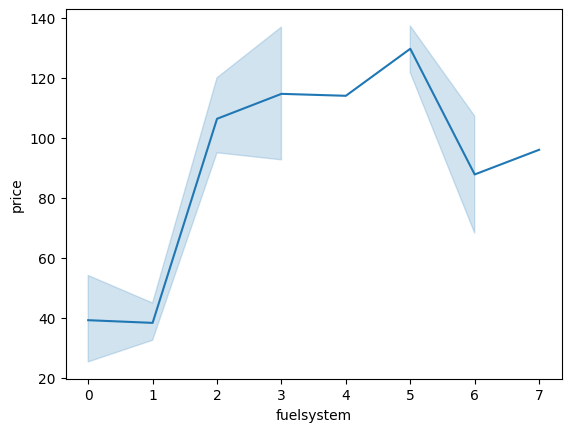

In [14]:
sbn.lineplot(data=dataset,x="fuelsystem",y="price")
plt.show()

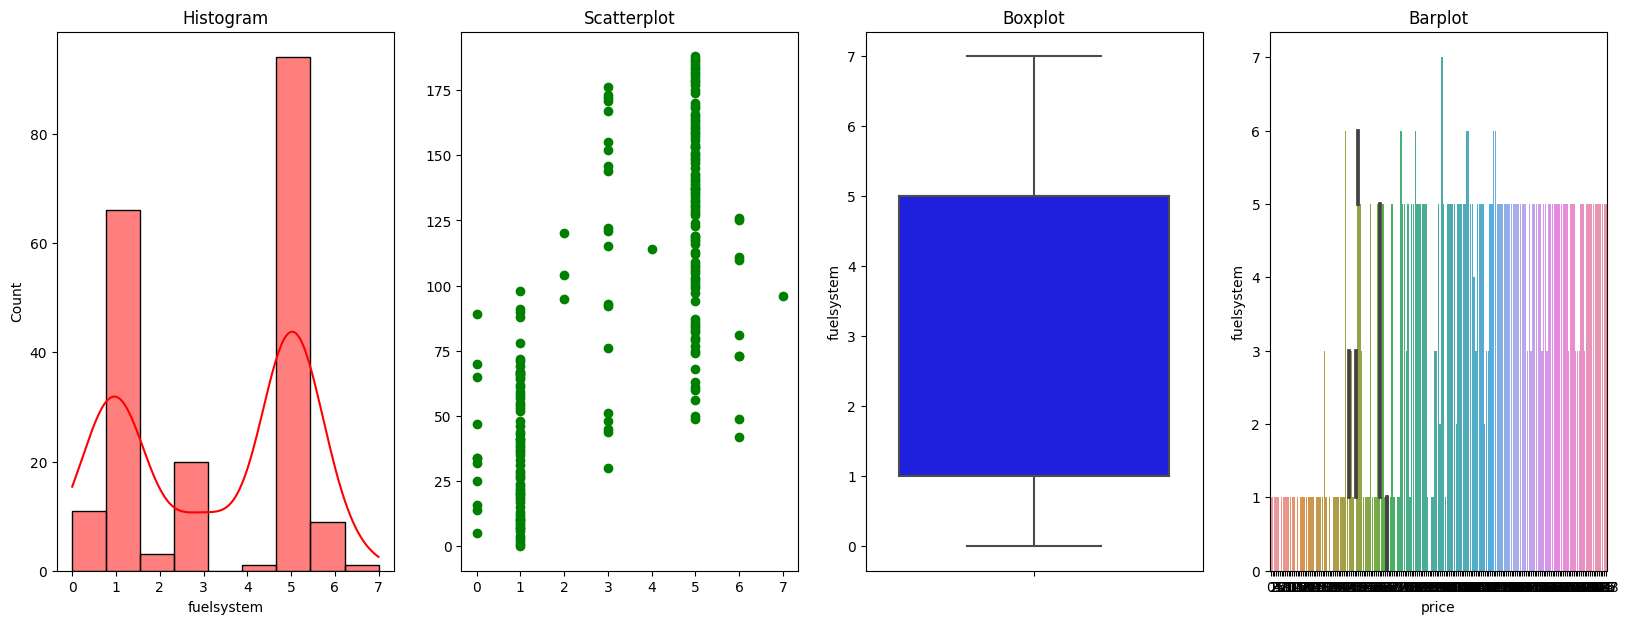

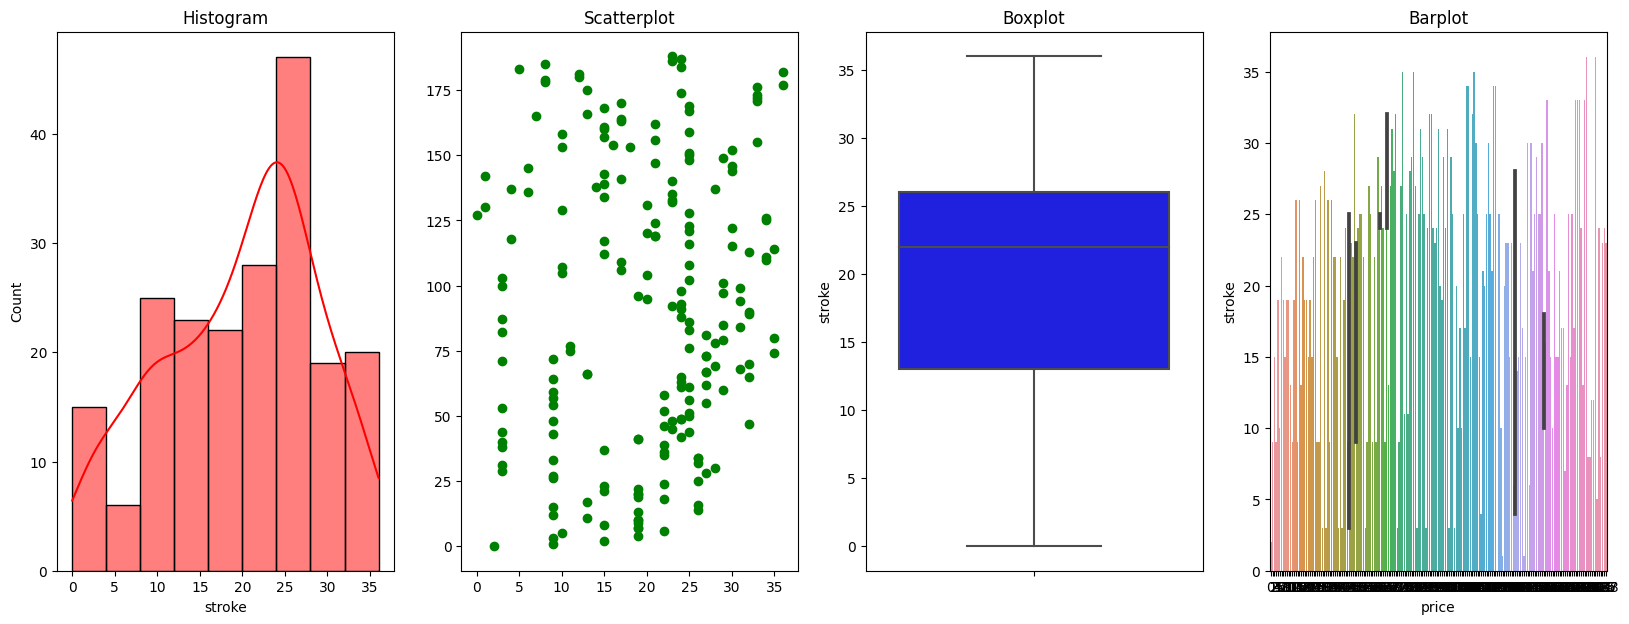

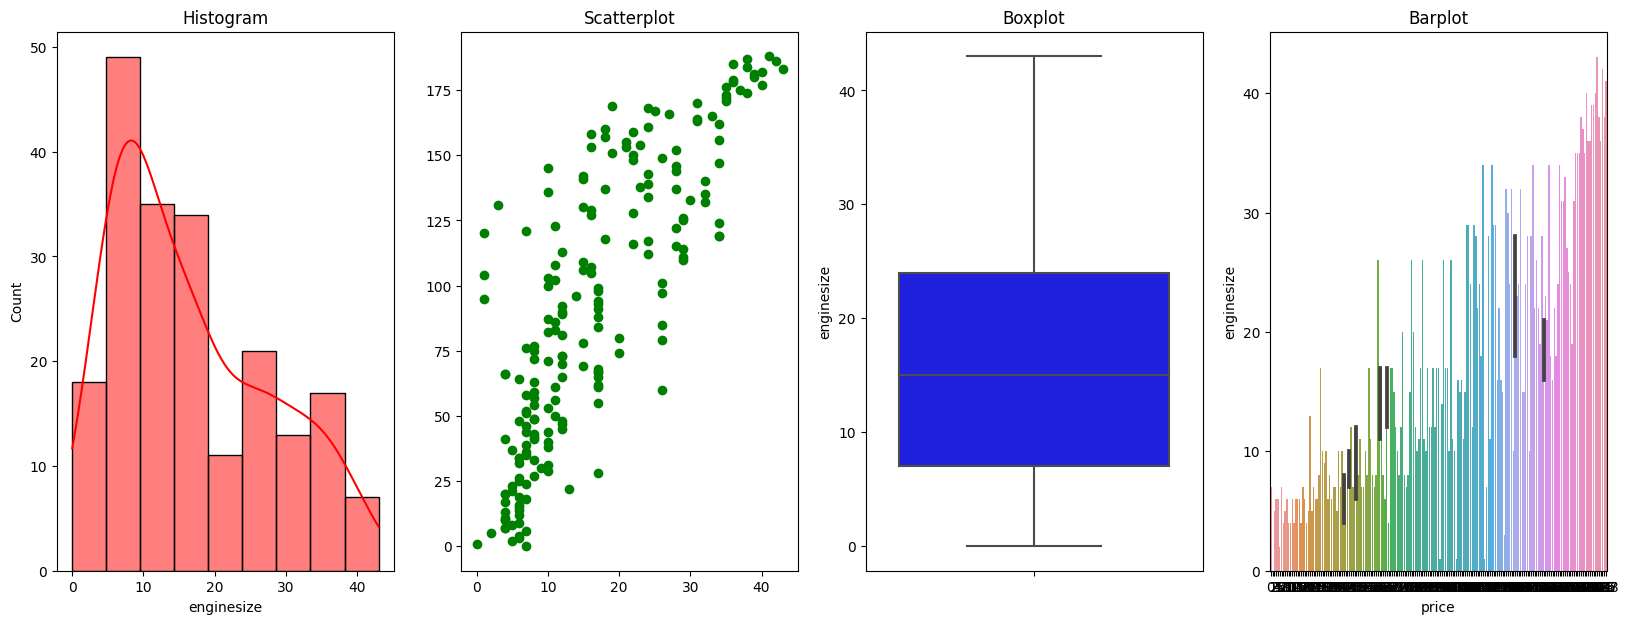

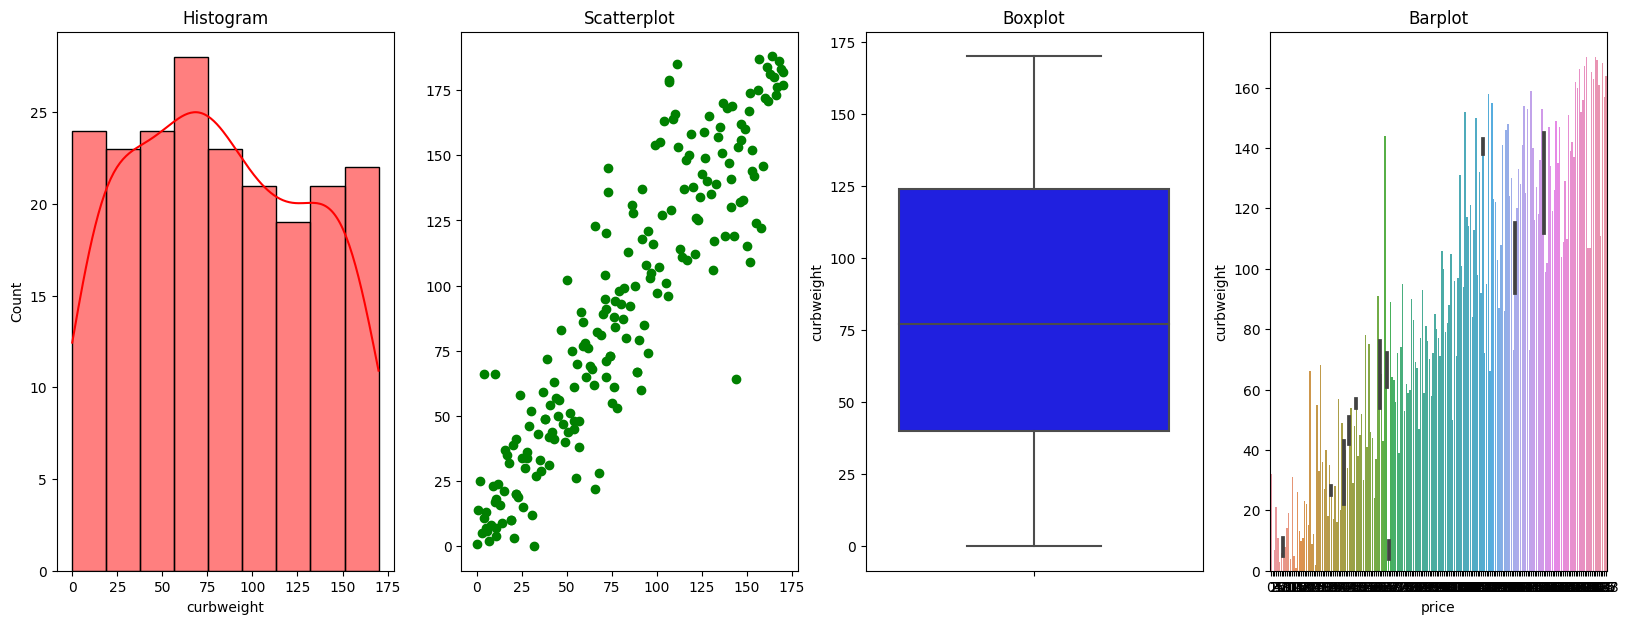

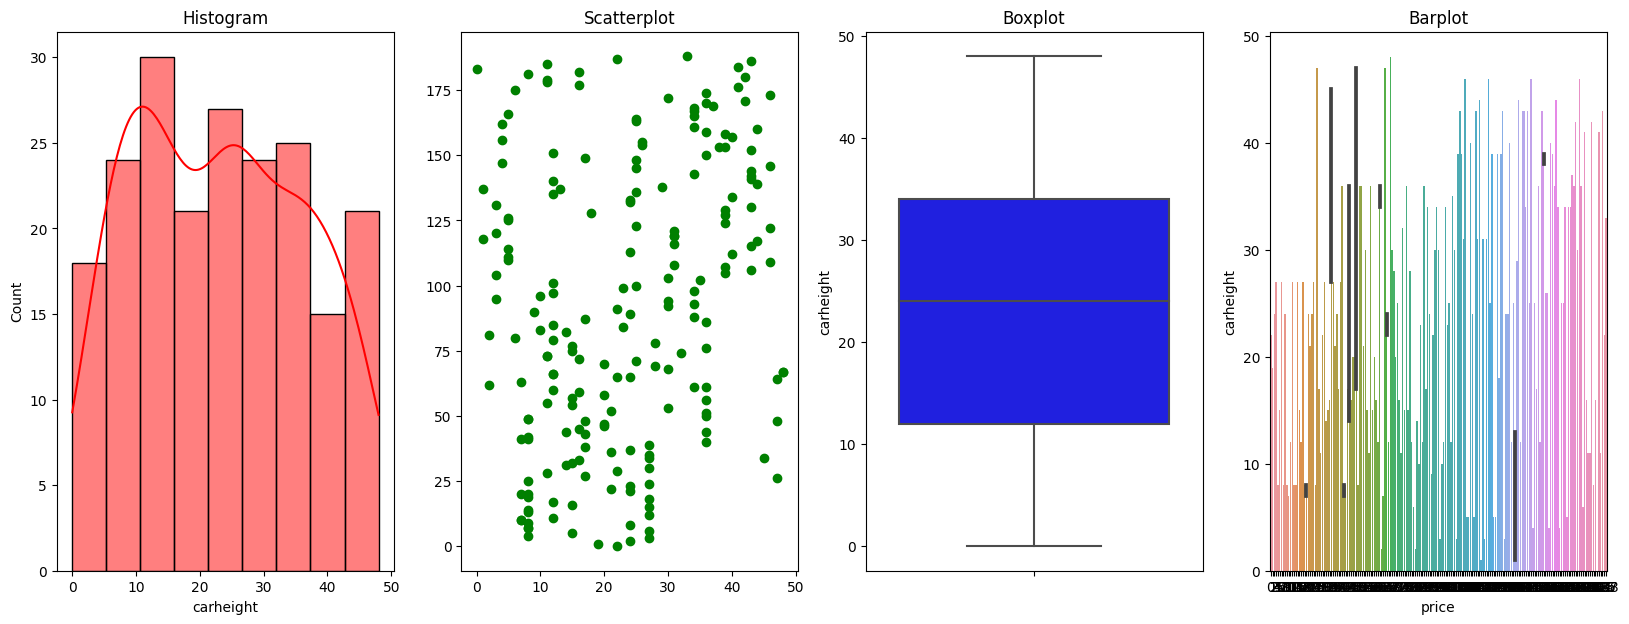

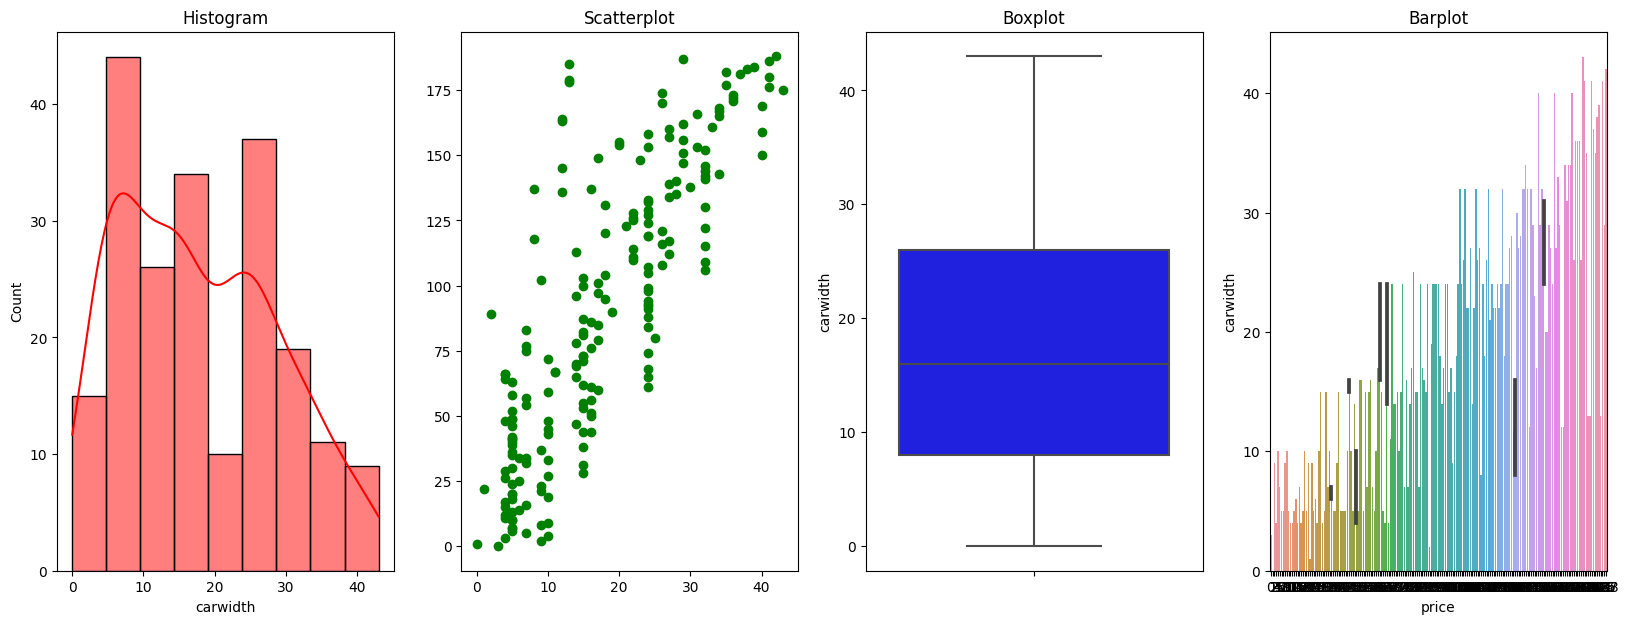

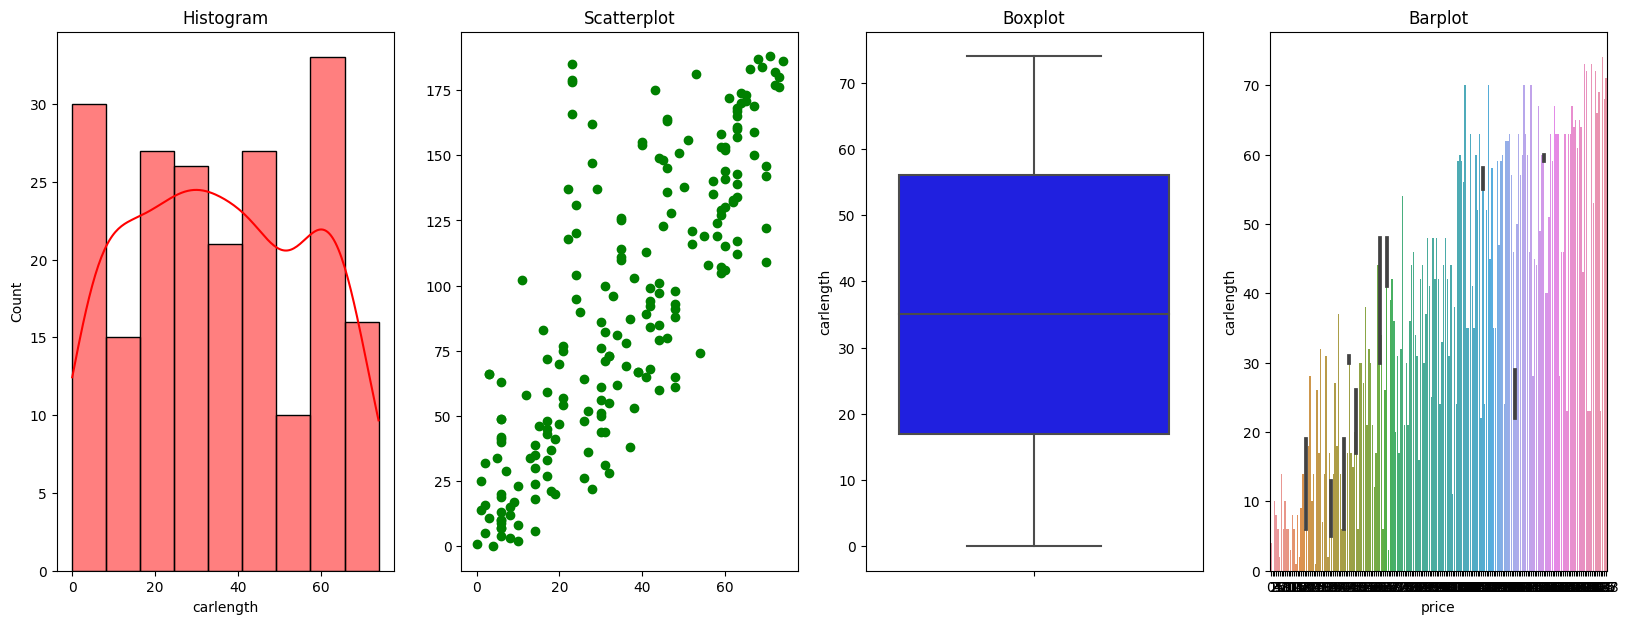

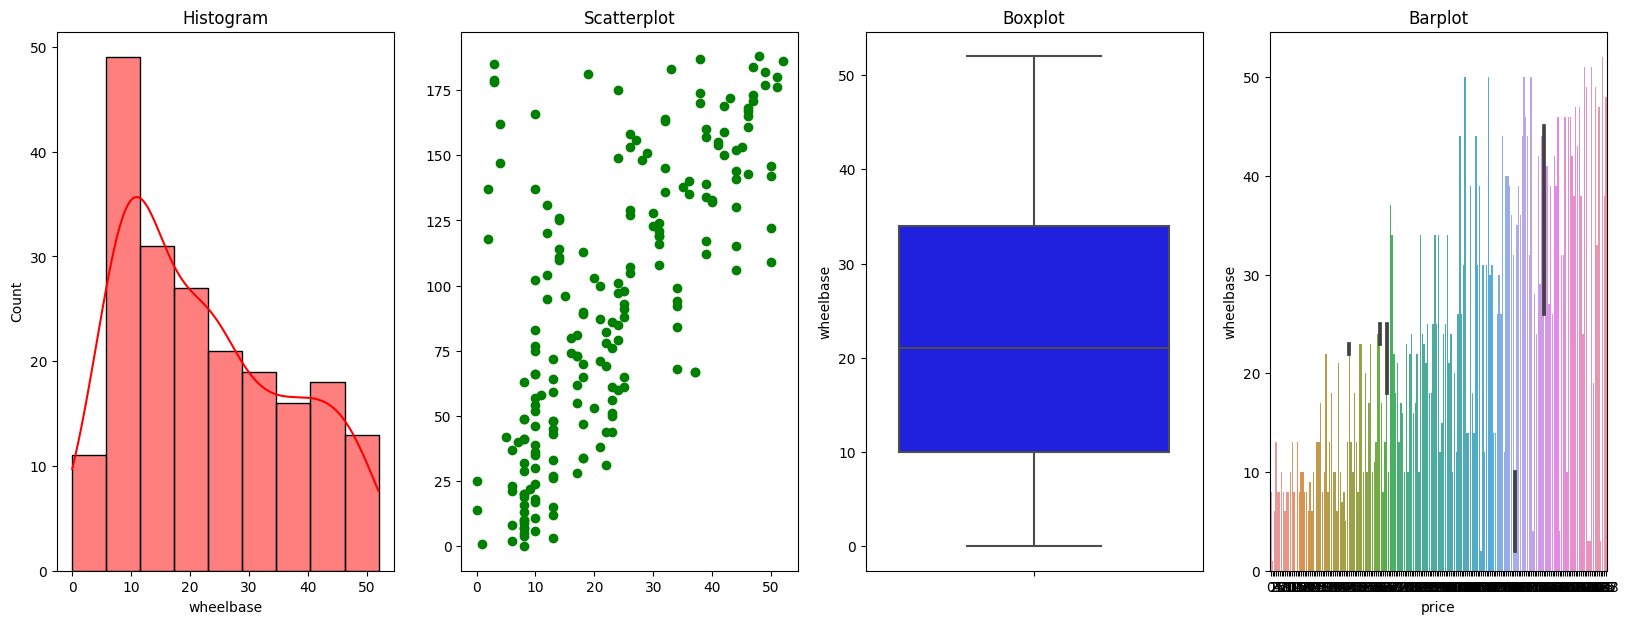

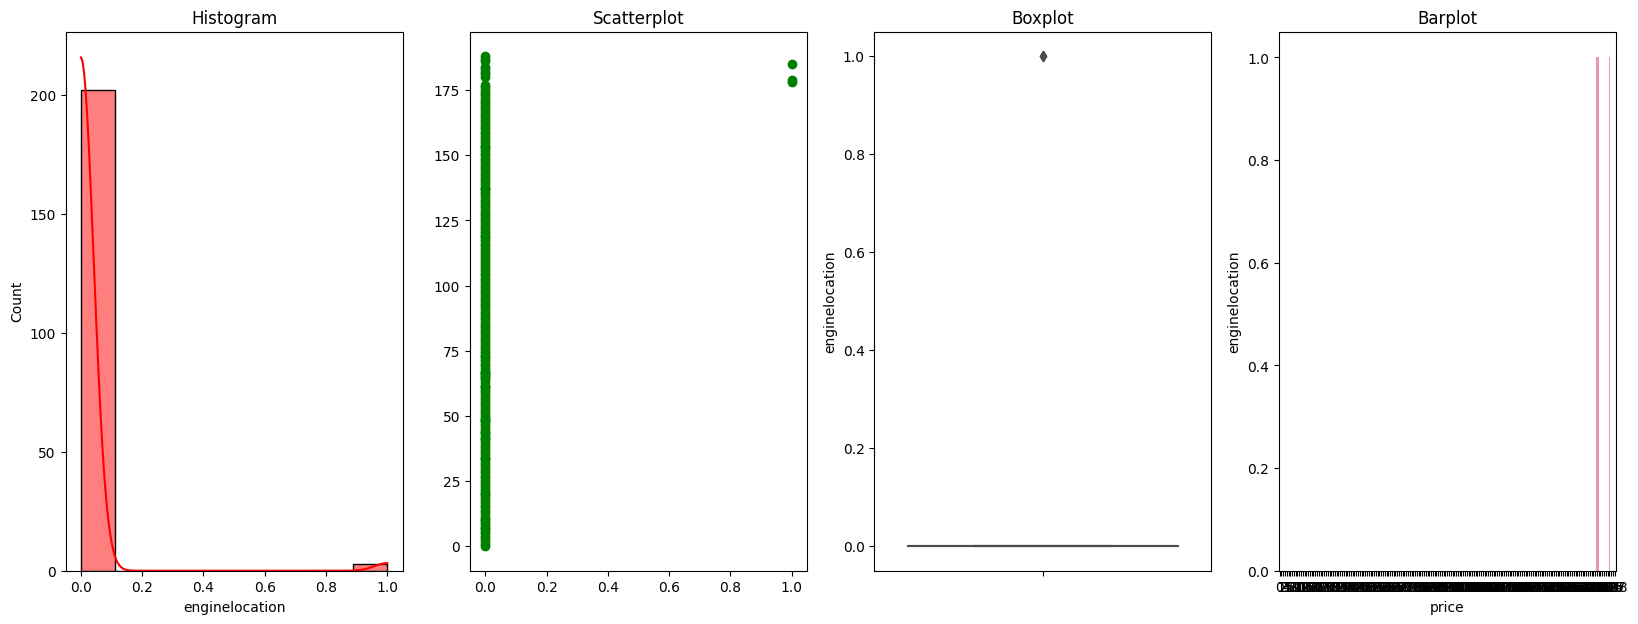

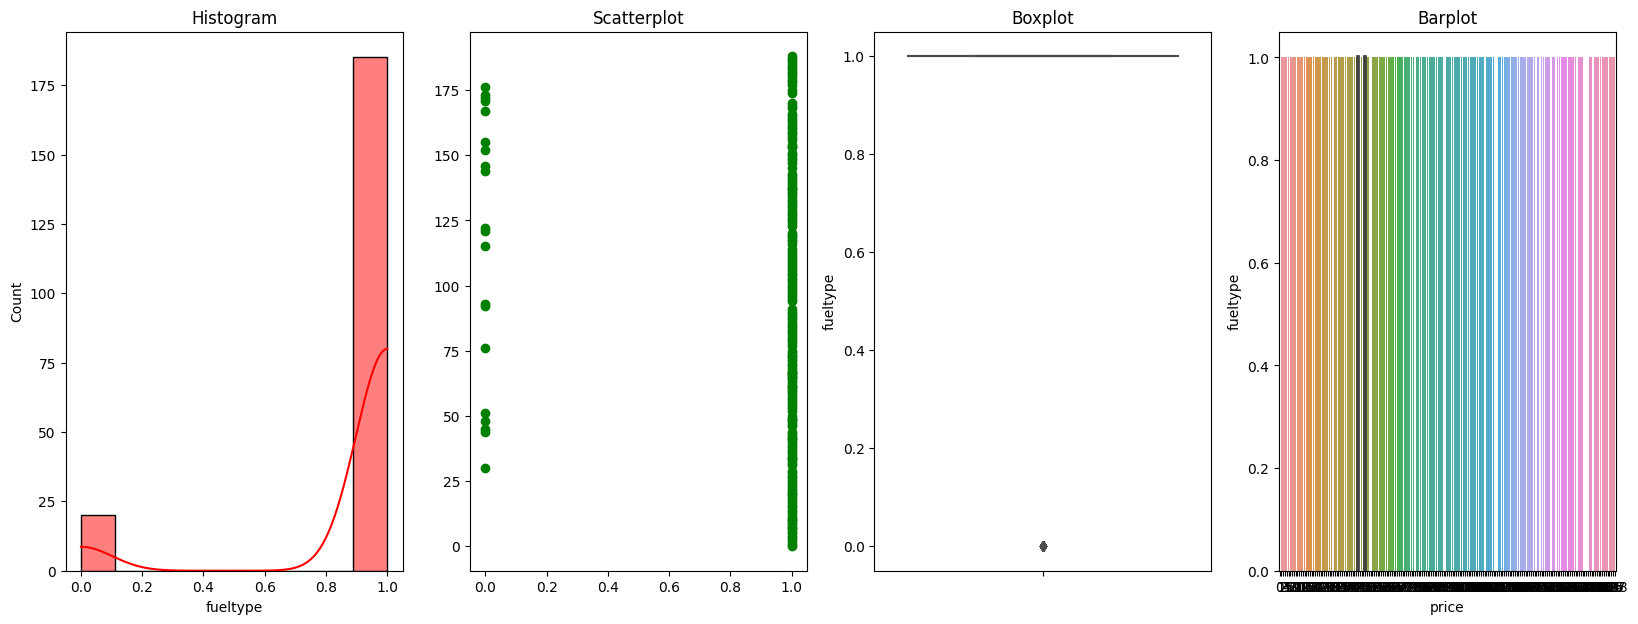

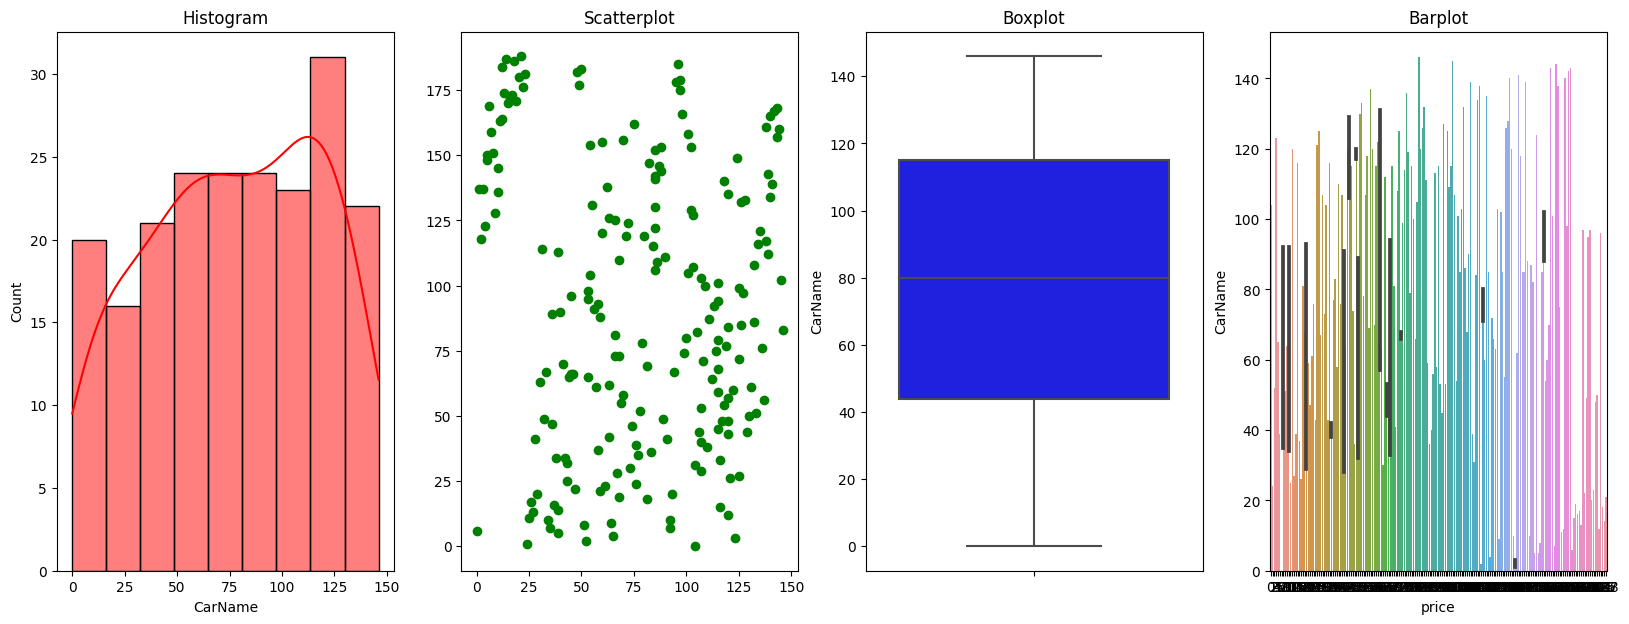

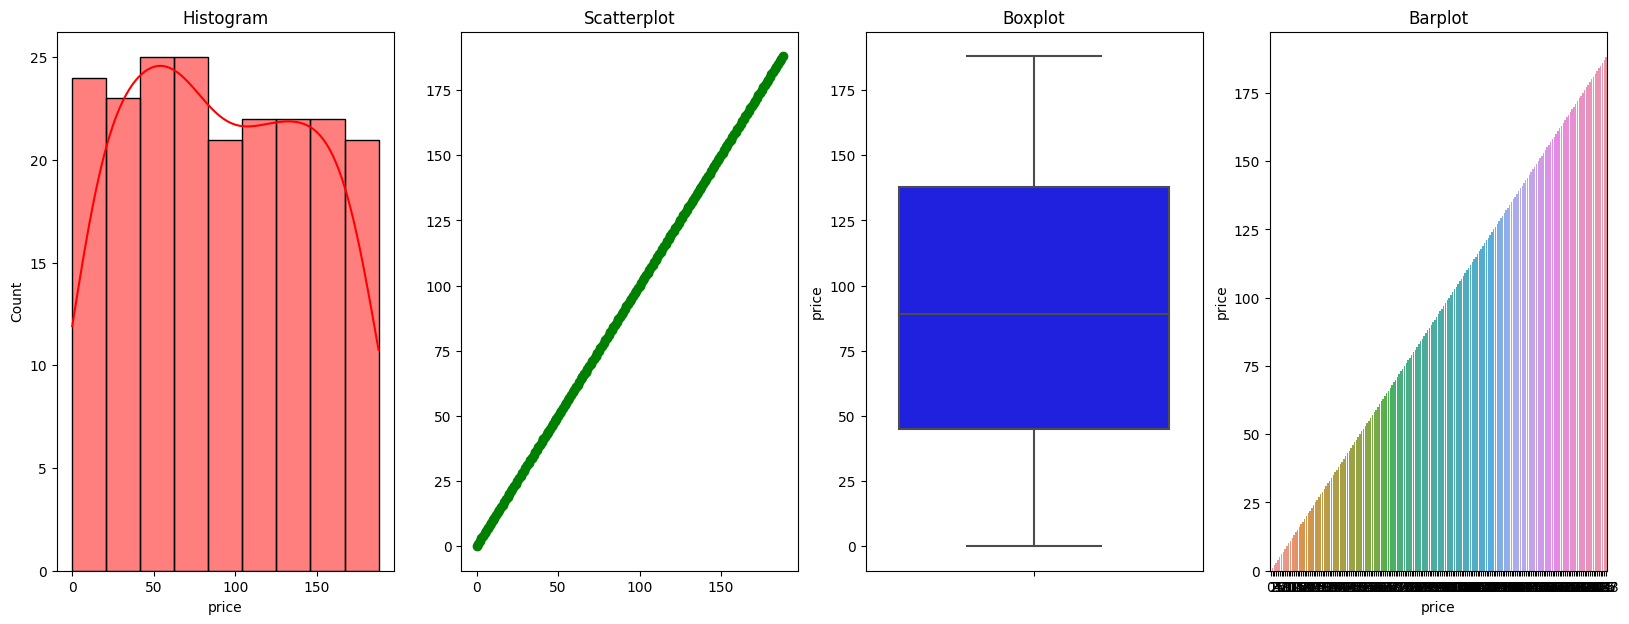

In [15]:
def diagnostic_plots(df, variable,target):

    # Define figure size.
    plt.figure(figsize=(20, 7))

    # histogram
    plt.subplot(1, 4, 1)
    sbn.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
    
    # boxplot
    try:
        plt.subplot(1, 4, 3)
        sbn.boxplot(y=df[variable],color = 'b')
        plt.title('Boxplot')
    except Exception as ex:
        print(ex)
    
    # barplot
    plt.subplot(1, 4, 4)
    sbn.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()
    
for item in dataset:
    diagnostic_plots(dataset,item,'price')

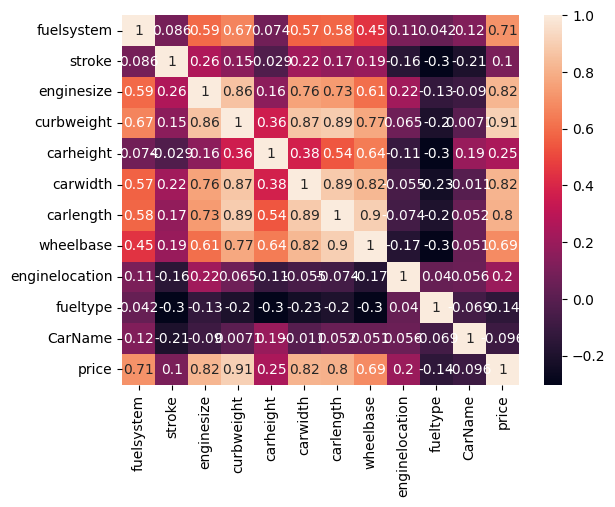

In [16]:
sbn.heatmap(dataset.corr(),annot=True)
plt.show()

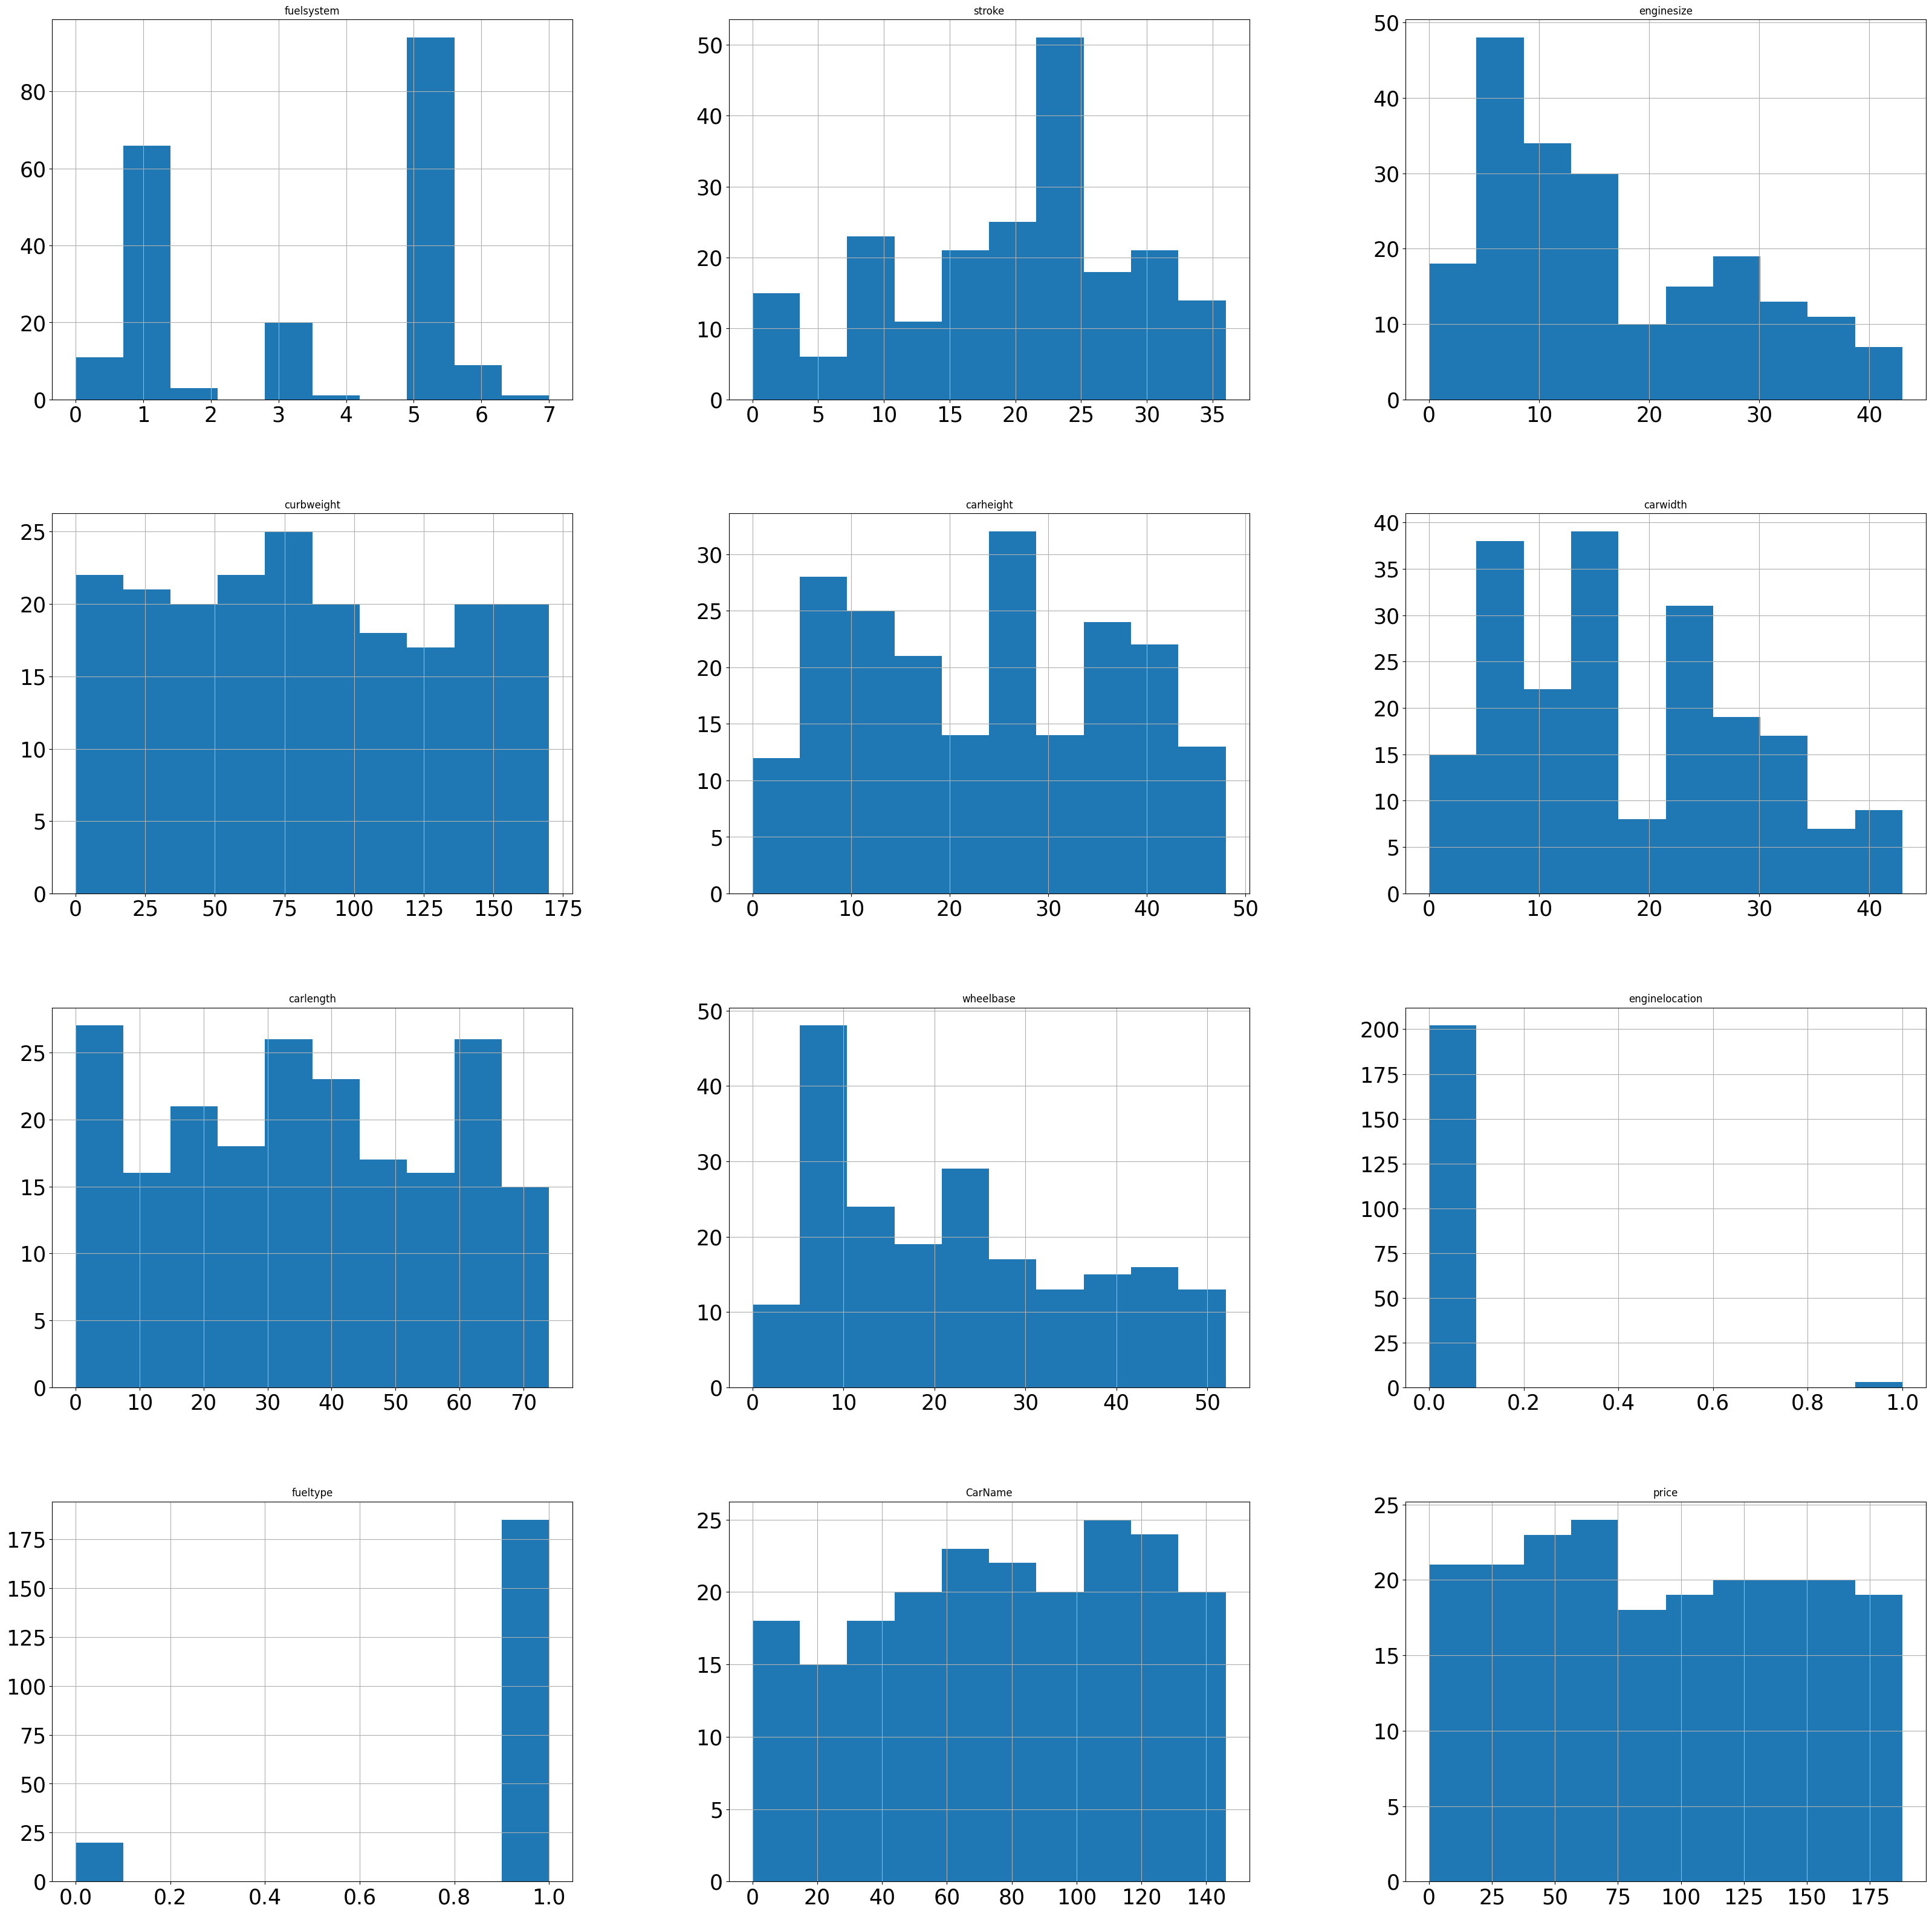

In [17]:
dataset.hist(figsize=(40,40),xlabelsize=25,ylabelsize=25)
plt.show()

In [18]:

label = dataset["price"]
features = dataset.drop("price",axis=1)

In [19]:
dataset.head()

,fuelsystem,stroke,enginesize,curbweight,carheight,carwidth,carlength,wheelbase,enginelocation,fueltype,CarName,price
0,5,4,18,92,1,8,22,2,0,1,2,118
1,5,4,18,92,1,8,22,2,0,1,3,137
2,5,28,28,115,13,16,29,10,0,1,1,137
3,5,25,11,66,25,21,45,30,0,1,4,123
4,5,25,22,116,25,23,45,28,0,1,5,148


In [20]:
features.head()

,fuelsystem,stroke,enginesize,curbweight,carheight,carwidth,carlength,wheelbase,enginelocation,fueltype,CarName
0,5,4,18,92,1,8,22,2,0,1,2
1,5,4,18,92,1,8,22,2,0,1,3
2,5,28,28,115,13,16,29,10,0,1,1
3,5,25,11,66,25,21,45,30,0,1,4
4,5,25,22,116,25,23,45,28,0,1,5


In [21]:
label.head()

0    118
1    137
2    137
3    123
4    148
Name: price, dtype: int64

## Split the data into training and test 

In [22]:
sc = StandardScaler()
features[features.columns] = sc.fit_transform(features[features.columns])
features[features.columns] = sc.fit_transform(features[features.columns])

In [23]:
xtrain , xtest , ytrain, ytest = train_test_split(features,label,test_size=0.2,shuffle=True)

In [24]:
print(ytrain.value_counts())
print(ytest.value_counts())

price
34     2
41     2
10     2
153    2
65     2
      ..
50     1
105    1
26     1
57     1
176    1
Name: count, Length: 155, dtype: int64
price
20     2
66     2
61     1
188    1
150    1
62     1
35     1
70     1
44     1
158    1
120    1
147    1
145    1
160    1
47     1
18     1
33     1
137    1
91     1
15     1
37     1
119    1
157    1
77     1
87     1
3      1
25     1
123    1
31     1
43     1
94     1
75     1
48     1
133    1
52     1
56     1
28     1
152    1
169    1
Name: count, dtype: int64


In [32]:
#try with Logistic regression
model =GradientBoostingRegressor()
model.fit(xtrain,ytrain)

#accuracy score
model.score(xtest,ytest)

pred = model.predict(xtest)

print(mean_squared_error(pred,ytest))

print(r2_score(pred,ytest))



381.0408774596247
0.8492940377112378


In [30]:
model =LinearRegression()
model.fit(xtrain,ytrain)

#accuracy score
model.score(xtest,ytest)

pred = model.predict(xtest)

print(mean_squared_error(pred,ytest))

print(r2_score(pred,ytest))

424.6336076619381
0.8204573216213973
